In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from TF_data_prepro import*

# **Load data**

In [2]:
## load data ##
df= pd.read_csv('df_clean.csv')

Display Data

In [3]:
## show load data
pd.set_option('display.max_columns', None)
df.reset_index(inplace=True,drop=True)
df=df.drop(columns=['Unnamed: 0'])
df

,order quantity,price per unit,Customer,By_way,Types,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,SPEC_1st_N,Ap_outer_r,Ap_L,AP_w,cen_outter_r,cen_L,cen_material,Shell_outer_r,shell_L,shell_material,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3
0,1,53000.000,新唐,SEMI,國內終端,X,X,S,20.0,105.0,136.0,2.85,29.0,136.0,SUS420,105.0,87.85,SUS304,W,M,R
1,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.2,204.0,1.02,44.0,204.0,SUS420,76.2,87.50,AL6061,A,M,N
2,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.2,204.0,1.02,44.0,204.0,SUS420,76.2,87.50,AL6061,A,M,N
3,1,59015.000,AMAT,DISPLAY,國內設備商,X,X,S,30.0,128.0,180.5,6.48,54.9,180.5,SUS420,128.0,121.00,SUS304,W,M,R
4,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.2,204.0,1.02,44.0,204.0,SUS420,76.2,87.50,AL6061,A,M,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2,80870.200,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.0,241.0,14.33,70.0,241.0,SUS420,170.0,127.00,SUS304,C,N,R
779,1,80870.200,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.0,241.0,14.33,70.0,241.0,SUS420,170.0,127.00,SUS304,C,N,R
780,1,81705.615,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.0,241.0,14.33,70.0,241.0,SUS420,170.0,127.00,SUS304,C,N,R
781,1,80754.150,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.0,241.0,14.33,70.0,241.0,SUS420,170.0,127.00,SUS304,C,N,R


Split Data into Numerical and Categorical Data

In [4]:

all_features,num,cat=feature_col_clean_split(df)

C:\Users\James\.conda\envs\data\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [5]:
num

,order quantity,price per unit,SPEC_1st_N,Ap_outer_r,Ap_L,AP_w,cen_outter_r,cen_L,Shell_outer_r,shell_L
0,1,53000.000,20.0,105.0,136.0,2.85,29.0,136.0,105.0,87.85
1,1,49500.000,625.0,76.2,204.0,1.02,44.0,204.0,76.2,87.50
2,1,49500.000,625.0,76.2,204.0,1.02,44.0,204.0,76.2,87.50
3,1,59015.000,30.0,128.0,180.5,6.48,54.9,180.5,128.0,121.00
4,1,49500.000,625.0,76.2,204.0,1.02,44.0,204.0,76.2,87.50
...,...,...,...,...,...,...,...,...,...,...
778,2,80870.200,40.0,170.0,241.0,14.33,70.0,241.0,170.0,127.00
779,1,80870.200,40.0,170.0,241.0,14.33,70.0,241.0,170.0,127.00
780,1,81705.615,40.0,170.0,241.0,14.33,70.0,241.0,170.0,127.00
781,1,80754.150,40.0,170.0,241.0,14.33,70.0,241.0,170.0,127.00


In [6]:
cat.columns

Index(['Customer', 'By_way', 'Types', 'SPEC_1st_L1', 'SPEC_1st_L2',
       'SPEC_1st_L3', 'cen_material', 'shell_material', 'SPEC_2nd_L1',
       'SPEC_2nd_L2', 'SPEC_2nd_L3'],
      dtype='object')

In [7]:
dummies = pd.get_dummies(cat[['Customer', 'By_way', 'Types', 'SPEC_1st_L1', 'SPEC_1st_L2',
       'SPEC_1st_L3', 'cen_material', 'shell_material', 'SPEC_2nd_L1',
       'SPEC_2nd_L2', 'SPEC_2nd_L3']],drop_first=True)

In [8]:
dummies

,Customer_AUOL6A,Customer_AUOL7A,Customer_AUOL8A,Customer_D&E,Customer_HONJI,Customer_INX-2,Customer_INX-4,Customer_INX-8,Customer_INX-T1,Customer_KJLC,Customer_PTW,Customer_Synergy,Customer_TSMC-8,Customer_UMC 8AB,Customer_UMC 8C,Customer_UMC 8S,Customer_VPC,Customer_WaferTech,Customer_上海碩創,Customer_上銀,Customer_中研院,Customer_亞太竑,Customer_亞智,Customer_亮傑,Customer_佳誼欣業,Customer_佶聖,Customer_俊尚科技,Customer_倍能真空,Customer_億碩,Customer_優貝克,Customer_兆遠科技,Customer_光頡科技,Customer_凌巨,Customer_力積電,Customer_力鼎精密,Customer_加高,Customer_北緯,Customer_南亞塑膠,Customer_南茂,Customer_吉利康,Customer_向新,Customer_和艦,Customer_天鴻,Customer_奈司特,Customer_宏達隆科技,Customer_崇文,Customer_工研院南院,Customer_巨孚,Customer_承德,Customer_承鋐儀器,Customer_捷永國際,Customer_新唐,Customer_日揚,Customer_柏燈,Customer_歐文國際,Customer_永喬,Customer_清大,Customer_準鑫,Customer_漢民,Customer_漢磊-3,Customer_漢磊二廠,Customer_漢辰,Customer_璟茂,Customer_穩懋,Customer_竑新,Customer_聚昌,Customer_聚訊實業,Customer_聯穎光電,Customer_艾美瑞,Customer_貫旭,Customer_超延,Customer_鈦昇,Customer_鋆?,Customer_鴻盛,By_way_INDUSTRIAL,By_way_LED,By_way_OTHERS,By_way_PV,By_way_SEMI,Types_國內終端,Types_國內設備商,Types_國外代理商,Types_國外終端,Types_國外設備商,SPEC_1st_L1_B,SPEC_1st_L1_D,SPEC_1st_L1_X,SPEC_1st_L2_C,SPEC_1st_L2_F,SPEC_1st_L2_G,SPEC_1st_L2_K,SPEC_1st_L2_N,SPEC_1st_L2_S,SPEC_1st_L2_X,SPEC_1st_L3_H,SPEC_1st_L3_M,SPEC_1st_L3_R,SPEC_1st_L3_S,SPEC_1st_L3_X,cen_material_SUS304,cen_material_SUS420,cen_material_SUS420+SUS304,cen_material_SUS630,shell_material_SUS303,shell_material_SUS304,shell_material_SUS316,shell_material_SUS316L,SPEC_2nd_L1_C,SPEC_2nd_L1_W,SPEC_2nd_L2_M,SPEC_2nd_L2_N,SPEC_2nd_L2_X,SPEC_2nd_L3_H,SPEC_2nd_L3_N,SPEC_2nd_L3_R,SPEC_2nd_L3_U,SPEC_2nd_L3_X,SPEC_2nd_L3_Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [9]:
data = pd.concat([num,dummies],axis=1)

In [10]:
data.columns

Index(['order quantity', 'price per unit', 'SPEC_1st_N', 'Ap_outer_r', 'Ap_L',
       'AP_w', 'cen_outter_r', 'cen_L', 'Shell_outer_r', 'shell_L',
       ...
       'SPEC_2nd_L1_W', 'SPEC_2nd_L2_M', 'SPEC_2nd_L2_N', 'SPEC_2nd_L2_X',
       'SPEC_2nd_L3_H', 'SPEC_2nd_L3_N', 'SPEC_2nd_L3_R', 'SPEC_2nd_L3_U',
       'SPEC_2nd_L3_X', 'SPEC_2nd_L3_Z'],
      dtype='object', length=128)

# Set X and y

In [11]:
y=data['price per unit'].values
X=data.drop(['price per unit'],axis=1).values

# Train Test splitting 

In [12]:
from sklearn.model_selection import train_test_split
x0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=101)
X_train, X_val, y_train, y_val= train_test_split(x0_train, y0_train, test_size=0.2,
                                                 random_state=101)
print(len(X_train), 'train dataset')
print(len(X_val), 'validation dataset')
print(len(X_test), 'test dataset')

500 train dataset
126 validation dataset
157 test dataset


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
X_train.shape

(500, 127)

In [16]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=Sequential()

model.add(Dense(127,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(2032,activation='relu'))
model.add(Dense(4064,activation='relu'))
model.add(Dense(16256,activation='relu'))
model.add(Dense(32512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(508,activation='relu'))

model.add((Dense(1)))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [17]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=512,
          epochs=200,
          verbose=1,
          callbacks=[early_stop]
          )


Epoch 1/200
1/1 [==============================] - 20s 20s/step - loss: 41234333696.0000 - accuracy: 0.0000e+00 - val_loss: 6134576128.0000 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 18s 18s/step - loss: 41053114368.0000 - accuracy: 0.0000e+00 - val_loss: 10786460672.0000 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 16s 16s/step - loss: 45519663104.0000 - accuracy: 0.0000e+00 - val_loss: 5885934080.0000 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 14s 14s/step - loss: 40794046464.0000 - accuracy: 0.0000e+00 - val_loss: 6305334272.0000 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 18s 18s/step - loss: 41223073792.0000 - accuracy: 0.0000e+00 - val_loss: 6315598848.0000 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 17s 17s/step - loss: 41234022400.0000 - accuracy: 0.0000e+00 - val_loss: 6315825664.0000 - val_accuracy: 0.0000e+

Epoch 50/200
1/1 [==============================] - 18s 18s/step - loss: 5494670336.0000 - accuracy: 0.0000e+00 - val_loss: 2356734208.0000 - val_accuracy: 0.0000e+00
Epoch 51/200
1/1 [==============================] - 15s 15s/step - loss: 7982273536.0000 - accuracy: 0.0000e+00 - val_loss: 2461706240.0000 - val_accuracy: 0.0000e+00
Epoch 52/200
1/1 [==============================] - 20s 20s/step - loss: 12018410496.0000 - accuracy: 0.0000e+00 - val_loss: 3415328768.0000 - val_accuracy: 0.0000e+00
Epoch 53/200
1/1 [==============================] - 16s 16s/step - loss: 11569996800.0000 - accuracy: 0.0000e+00 - val_loss: 6304287744.0000 - val_accuracy: 0.0000e+00
Epoch 54/200
1/1 [==============================] - 16s 16s/step - loss: 5305092608.0000 - accuracy: 0.0000e+00 - val_loss: 11828830208.0000 - val_accuracy: 0.0000e+00
Epoch 55/200
1/1 [==============================] - 13s 13s/step - loss: 4606163456.0000 - accuracy: 0.0000e+00 - val_loss: 13977239552.0000 - val_accuracy: 0.000

In [18]:
losses=pd.DataFrame(model.history.history)

In [19]:
metrics=pd.DataFrame(model.history.history)

<AxesSubplot:>

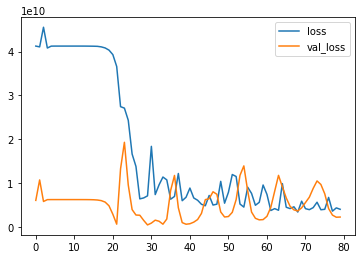

In [20]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

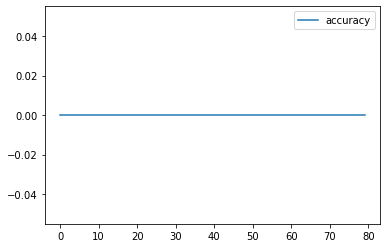

In [21]:
metrics[['accuracy']].plot()

<AxesSubplot:>

<Figure size 1440x2160 with 0 Axes>

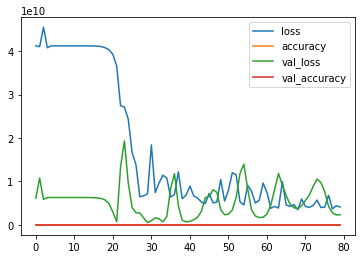

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
losses.plot()

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [24]:
predictions=model.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test,predictions))

39619.610925867746

In [26]:
mean_absolute_error(y_test,predictions)

12593.875030219944

In [27]:
df['price per unit'].describe()

count    7.830000e+02
mean     4.810872e+04
std      1.614491e+05
min      6.809600e+02
25%      1.060307e+04
50%      2.992500e+04
75%      4.950000e+04
max      3.980000e+06
Name: price per unit, dtype: float64

In [28]:
explained_variance_score(y_test,predictions)

0.5481956769291172

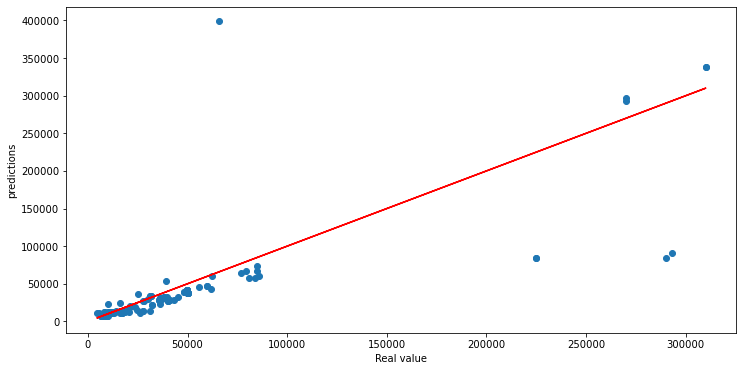

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Real value')
plt.ylabel('predictions')
plt.show()

In [30]:
import numpy as np
i=np.random.randint(len(df), size=1)
single_feedthrough=data.drop('price per unit',axis=1).iloc[i]

In [31]:
single_feedthrough=scaler.transform(single_feedthrough.values.reshape(-1,127))

In [32]:
model.predict(single_feedthrough)

array([[32813.973]], dtype=float32)

In [33]:
df['price per unit'].iloc[i]

582    38000.0
Name: price per unit, dtype: float64

In [34]:
y_test.shape

(157,)

In [35]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

C:\Users\James\.conda\envs\data\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


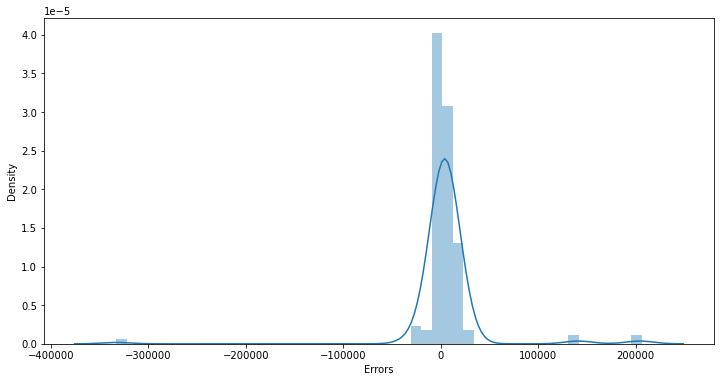

In [36]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

In [37]:
## model.save('model_NumCat_068.h5')